# Import Dataframes

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
columns_ordered = [
    'task_name', 'use_modded', 
    'learning_rate', 'insert_dropout', 'catch_dropout', 'train_data_frac', 
    'max_acc', 'min_evalLoss', 'min_evalLoss_epoch',  'min_evalLoss_step',
    'output_dir', 'max_matthews',
    'eval_accuracy', 'eval_matthews_correlation',
    'min_trainLoss', 'min_trainLoss_epoch', 'min_trainLoss_step',
    'max_train_steps'
]

In [3]:
df_list = [
    pd.read_csv(
        r"G:\Meine Ablage\Masterarbeit\fantastic-umbrella\finished_runs\03_reference_runs_corrected\run_summary.csv"
        )
    ]
df_list[0]["catch_dropout"] = np.nan
df_list[0]["use_modded"] = False
df_list[0] = df_list[0][columns_ordered]
df_list.append(
    pd.read_csv(
        r"G:\Meine Ablage\Masterarbeit\fantastic-umbrella\finished_runs\04_mod_runs\run_summary.csv"
        )[columns_ordered]
        )

In [4]:
df = pd.concat(df_list, ignore_index=True)
df.use_modded = df.use_modded.fillna(False)
df.to_csv(r"G:\Meine Ablage\Masterarbeit\fantastic-umbrella\finished_runs\\run_summary_small.csv")

Dropout in pretrained model was 0.1. Replace the value in the summary.

In [5]:
df.catch_dropout = df.catch_dropout.replace(-1.0,0.1)
df.insert_dropout = df.insert_dropout.replace(-1.0,0.1)

In [6]:
df.shape

(480, 18)

In [62]:
import dtale
# filter = (df["use_modded"]) & (~df["catch_dropout"].isna())
# d = dtale.show(df.loc[filter])
d = dtale.show(df)
d._main_url

'http://DESKTOP-HFP2417:40000/dtale/main/8'

In [57]:
df.loc[filter]

,task_name,learning_rate,max_train_steps,output_dir,insert_dropout,train_data_frac,eval_accuracy,max_acc,max_matthews,min_evalLoss,min_evalLoss_step,min_evalLoss_epoch,min_trainLoss,min_trainLoss_step,min_trainLoss_epoch,eval_matthews_correlation,use_modded,catch_dropout
357,cola,0.000005,5360,/home/lange/fantastic-umbrella/runs/run_modded...,0.30,0.25,NaN,NaN,0.338503,0.606027,335,4,0.043828,5092,75,0.331477,False,-1.0
358,cola,0.000005,10720,/home/lange/fantastic-umbrella/runs/run_modded...,0.30,0.50,NaN,NaN,0.489720,0.607595,268,1,0.044229,10452,77,0.461297,False,-1.0
359,cola,0.000005,16080,/home/lange/fantastic-umbrella/runs/run_modded...,0.30,0.75,NaN,NaN,0.508638,0.615155,201,0,0.050212,16080,79,0.499924,False,-1.0
360,cola,0.000005,21440,/home/lange/fantastic-umbrella/runs/run_modded...,0.30,1.00,NaN,NaN,0.556620,0.615085,268,0,0.051385,21440,79,0.540250,False,-1.0
361,cola,0.000005,5360,/home/lange/fantastic-umbrella/runs/run_modded...,0.20,0.25,NaN,NaN,0.462951,0.542631,335,4,0.007836,5159,76,0.417977,False,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,wnli,0.000020,1600,/home/lange/fantastic-umbrella/runs/run_modded_4,0.15,1.00,0.211268,0.563380,NaN,0.694302,40,1,0.016503,1540,76,NaN,False,-1.0
473,wnli,0.000020,400,/home/lange/fantastic-umbrella/runs/run_modded_3,0.10,0.25,0.408451,0.436620,NaN,0.722251,5,0,0.021073,400,79,NaN,False,-1.0
474,wnli,0.000020,800,/home/lange/fantastic-umbrella/runs/run_modded_2,0.10,0.50,0.338028,0.535211,NaN,0.710069,10,0,0.015658,630,62,NaN,False,-1.0
475,wnli,0.000020,1200,/home/lange/fantastic-umbrella/runs/run_modded_1,0.10,0.75,0.183099,0.507042,NaN,0.700637,30,1,0.012126,1035,68,NaN,False,-1.0


# Analysis

[Text(0, 0, '0.30'),
 Text(1, 0, '0.15'),
 Text(2, 0, '0.20'),
 Text(3, 0, '0.05'),
 Text(4, 0, '0.18'),
 Text(5, 0, '0.03'),
 Text(6, 0, '0.00'),
 Text(7, 0, '0.10'),
 Text(8, 0, '-0.05'),
 Text(9, 0, '0.20'),
 Text(10, 0, '0.08'),
 Text(11, 0, '0.05')]

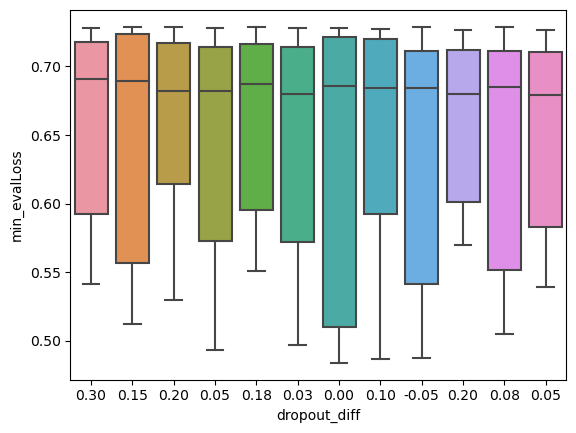

In [73]:
df_analysis = df.copy()
df_analysis["dropout_diff"] = df_analysis["insert_dropout"]-df_analysis["catch_dropout"]
filter = (df["train_data_frac"]==0.25)
g = sns.boxplot(x="dropout_diff", y="min_evalLoss",
            # hue="train_data_frac",
            data=df_analysis[filter])
xlabels = ['{:,.2f}'.format(x) for x in df_analysis["dropout_diff"].dropna().unique()]
g.set_xticklabels(xlabels)

<Axes: xlabel='train_data_frac', ylabel='min_evalLoss'>

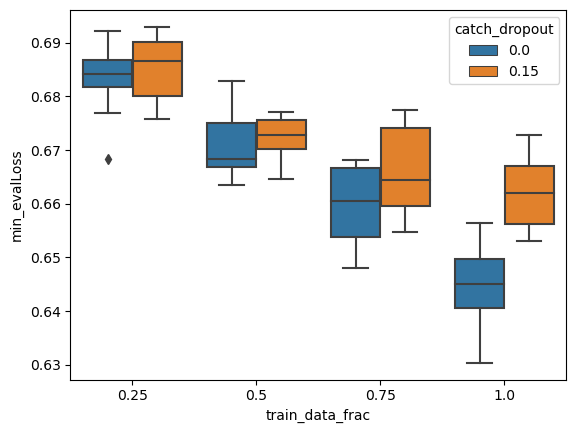

In [51]:
filter = (df["task_name"]=="rte") & (df["use_modded"] == True)
sns.boxplot(x="train_data_frac", y="min_evalLoss",
            hue="catch_dropout",
            data=df.loc[filter,])